# Write-Up 

## Background:
**RTS (Road TO Success) is A company that have several vending machines that sells drinks , food and electronics.
RTS want to put their vending machines in best places to gain benefit.**

## Project Scope: 
### ***Where to put vending machines in summer?***
**RTS focus on where to put vending machines that sells drinks, foods and electronics in stations that have most traffic in the summer.By analysing the given data Im going to find top stations , best entries per station ,and daily trafic per week to do mantenance and refill vending machines.**


## Data Description:

**Main data : New York City: MTA turnstile data (http://web.mta.info/developers/turnstile.html).
I'm taking three months (summer) in three years 2017/18/19 (total 9 months).
My Dataset has 7809430 rows and 11 columns**
### culomns:
* C/A      = Control Area 
* UNIT     = Remote Unit for a station
* SCP      = Subunit Channel Position represents an specific address for a device
* STATION  = Represents the station name the device is located at
* LINENAME = Represents all train lines that can be boarded at this station.
* DIVISION = Represents the Line originally the station.
* DATE     = Represents the date (MM-DD-YY)
* TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
* DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           -1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           -2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
* ENTRIES  = The comulative entry register value for a device
* EXIST    = The cumulative exit register value for a device**

## Tools:
    1- SQLite,DB browser, SQLAlchemy.
    2- Python,Pandas,Numpy.
    3- Seaborn and Matplotlib.

In [1]:
#importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import datetime
from sqlalchemy import create_engine
%matplotlib inline

## Data Gathring

**Next cells we will take our dataset from sql and import it to python.**

In [2]:
engine = create_engine("sqlite:///SUMMERS.db")

In [3]:
all_tables = engine.table_names()
all_tables

<ipython-input-3-9dbbbb8bc6ba>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


['turnstile_170603',
 'turnstile_170610',
 'turnstile_170617',
 'turnstile_170624',
 'turnstile_170701',
 'turnstile_170708',
 'turnstile_170715',
 'turnstile_170722',
 'turnstile_170729',
 'turnstile_170805',
 'turnstile_170812',
 'turnstile_170819',
 'turnstile_170826',
 'turnstile_180602',
 'turnstile_180609',
 'turnstile_180616',
 'turnstile_180623',
 'turnstile_180630',
 'turnstile_180707',
 'turnstile_180714',
 'turnstile_180721',
 'turnstile_180728',
 'turnstile_180804',
 'turnstile_180811',
 'turnstile_180818',
 'turnstile_180825',
 'turnstile_190601',
 'turnstile_190608',
 'turnstile_190615',
 'turnstile_190622',
 'turnstile_190629',
 'turnstile_190706',
 'turnstile_190713',
 'turnstile_190727',
 'turnstile_190803',
 'turnstile_190810',
 'turnstile_190817',
 'turnstile_190824',
 'turnstile_190831']

In [4]:
data = pd.read_sql('SELECT * FROM turnstile_170603 UNION  SELECT * FROM turnstile_170610 UNION SELECT * FROM turnstile_170617 UNION SELECT * FROM turnstile_170624 UNION SELECT * FROM turnstile_170701 UNION SELECT * FROM turnstile_170708 UNION  SELECT * FROM turnstile_170715 UNION  SELECT * FROM turnstile_170722 UNION  SELECT * FROM turnstile_170729 UNION  SELECT * FROM turnstile_170805 UNION  SELECT * FROM turnstile_170812 UNION  SELECT * FROM turnstile_170819 UNION  SELECT * FROM turnstile_170826 UNION  SELECT * FROM turnstile_180602 UNION  SELECT * FROM turnstile_180609 UNION  SELECT * FROM turnstile_180616 UNION  SELECT * FROM turnstile_180623 UNION  SELECT * FROM turnstile_180630 UNION  SELECT * FROM turnstile_180707 UNION  SELECT * FROM turnstile_180714 UNION  SELECT * FROM turnstile_180721 UNION  SELECT * FROM turnstile_180728 UNION  SELECT * FROM turnstile_180804 UNION  SELECT * FROM turnstile_180811 UNION  SELECT * FROM turnstile_180818 UNION  SELECT * FROM turnstile_180825 UNION  SELECT * FROM turnstile_190601 UNION  SELECT * FROM turnstile_190608 UNION  SELECT * FROM turnstile_190615 UNION  SELECT * FROM turnstile_190622 UNION  SELECT * FROM turnstile_190629 UNION  SELECT * FROM turnstile_190706 UNION  SELECT * FROM turnstile_190713 UNION  SELECT * FROM turnstile_190727 UNION  SELECT * FROM turnstile_190803 UNION  SELECT * FROM turnstile_190810 UNION  SELECT * FROM turnstile_190817 UNION  SELECT * FROM turnstile_190824 UNION  SELECT * FROM turnstile_190831;', engine)



In [5]:
# looking to first 5 rows 
head = pd.read_sql('SELECT * FROM turnstile_170603 limit 5;', engine)
head

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,6195217,2098317
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,04:00:00,REGULAR,6195240,2098318
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,08:00:00,REGULAR,6195256,2098347
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,12:00:00,REGULAR,6195346,2098432
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,16:00:00,REGULAR,6195518,2098491


In [6]:
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 7809430 rows and 11 columns


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7809430 entries, 0 to 7809429
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 655.4+ MB


In [8]:
data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

## Data Wrangle and Cleaning

In [9]:
#adding date and time together
data["DATE_TIME"] = pd.to_datetime(data.DATE + " " + data.TIME, 
                                            format="%m/%d/%Y       %H:%M:%S")

In [10]:
data.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411,2019-05-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415,2019-05-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443,2019-05-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500,2019-05-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555,2019-05-25 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,7072456,2396593,2019-05-25 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,00:00:00,REGULAR,6633898,2248498,2018-05-26 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,04:00:00,REGULAR,6633916,2248500,2018-05-26 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,08:00:00,REGULAR,6633928,2248517,2018-05-26 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,12:00:00,REGULAR,6634015,2248577,2018-05-26 12:00:00


**from above data I found date is not sorted. so we want to sort our dataset**

In [11]:
data = data.sort_values(['DATE_TIME','C/A','UNIT','SCP'], ascending = True).reset_index(drop=True)

In [12]:
data.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,6195217,2098317,2017-05-27
1,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,5605857,1243341,2017-05-27
2,A002,R051,02-03-00,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,918909,3409718,2017-05-27
3,A002,R051,02-03-01,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,299747,485275,2017-05-27
4,A002,R051,02-03-02,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,5381677,7417997,2017-05-27
5,A002,R051,02-03-03,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,5016252,5937197,2017-05-27
6,A002,R051,02-03-04,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,6309477,3371388,2017-05-27
7,A002,R051,02-03-05,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,10172816,1314137,2017-05-27
8,A002,R051,02-03-06,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,8008443,482630,2017-05-27
9,A002,R051,02-05-00,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,1396,0,2017-05-27


### Now I want to look for duplicate entries

In [13]:
(data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(50)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1825554,N045,R187,01-00-01,81 ST-MUSEUM,2019-07-09 09:00:00,2
201310,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-11 13:00:00,2
201321,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-13 09:00:00,2
201320,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-13 05:00:00,2
201319,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-13 01:00:00,2
201318,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 21:00:00,2
201317,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 17:00:00,2
201316,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 13:00:00,2
201315,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 09:00:00,2
201314,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 05:00:00,2


In [14]:
# Get rid of the duplicate entry
data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [15]:
#checking 
(data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-05-27 00:00:00,1
5206239,R143,R032,02-00-02,TIMES SQ-42 ST,2018-07-22 08:00:00,1
5206251,R143,R032,02-00-02,TIMES SQ-42 ST,2018-07-24 08:00:00,1
5206250,R143,R032,02-00-02,TIMES SQ-42 ST,2018-07-24 04:00:00,1
5206249,R143,R032,02-00-02,TIMES SQ-42 ST,2018-07-24 00:00:00,1


**Delete data that is messsy**

In [16]:
data.DESC.value_counts()

REGULAR       7780716
RECOVR AUD      28648
Name: DESC, dtype: int64

In [17]:
data = data[data['DESC'] == 'REGULAR']

In [18]:
data.DESC.value_counts()

REGULAR    7780716
Name: DESC, dtype: int64

In [19]:
#changing type of data ,object to datetime
data.DATE = pd.to_datetime(data.DATE)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7780716 entries, 7809047 to 0
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       datetime64[ns]
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 771.7+ MB


In [21]:
#defining new dataframe
ts_daily = (data
                        .groupby(["C/A", "UNIT", "SCP", "STATION","DATE"],as_index=False)
                        .ENTRIES.first())
ts_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-05-27,6195765
1,A002,R051,02-00-00,59 ST,2017-05-28,6196446
2,A002,R051,02-00-00,59 ST,2017-05-29,6197107
3,A002,R051,02-00-00,59 ST,2017-05-30,6198624
4,A002,R051,02-00-00,59 ST,2017-05-31,6200200


**in next cells, adding new culomns to calculate daily eentries and exits and find daily trafic**

In [22]:

ts_daily[["PREV_DATE", "PREV_ENTRIES"]] = (ts_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-22-4024546728ca>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ts_daily[["PREV_DATE", "PREV_ENTRIES"]] = (ts_daily


In [23]:
ts_daily.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'PREV_DATE',
       'PREV_ENTRIES'],
      dtype='object')

In [24]:
ts_daily['EXITS'] = (data.groupby(['C/A','UNIT','SCP','STATION','DATE']).EXITS.first().reset_index().EXITS)

In [25]:
ts_daily["PREV_EXITS"] = (ts_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

In [26]:
ts_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,EXITS,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2017-05-27,6195765,NaT,NaN,2098537,NaN
1,A002,R051,02-00-00,59 ST,2017-05-28,6196446,2017-05-27,6195765.0,2098723,2098537.0
2,A002,R051,02-00-00,59 ST,2017-05-29,6197107,2017-05-28,6196446.0,2098922,2098723.0
3,A002,R051,02-00-00,59 ST,2017-05-30,6198624,2017-05-29,6197107.0,2099521,2098922.0
4,A002,R051,02-00-00,59 ST,2017-05-31,6200200,2017-05-30,6198624.0,2100072,2099521.0


In [27]:
#droping first row
ts_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [28]:
#checking for decrease in entries and exits
ts_daily[ts_daily["ENTRIES"] < ts_daily["PREV_ENTRIES"]].count()

C/A             13161
UNIT            13161
SCP             13161
STATION         13161
DATE            13161
ENTRIES         13161
PREV_DATE       13161
PREV_ENTRIES    13161
EXITS           13161
PREV_EXITS      13161
dtype: int64

In [29]:
ts_daily[ts_daily["EXITS"] < ts_daily["PREV_EXITS"]].count()

C/A             11127
UNIT            11127
SCP             11127
STATION         11127
DATE            11127
ENTRIES         11127
PREV_DATE       11127
PREV_ENTRIES    11127
EXITS           11127
PREV_EXITS      11127
dtype: int64

In [30]:
#see what is happening
mask = ((data["C/A"] == "A002") & 
(data["UNIT"] == "R051") & 
(data["SCP"] == "02-06-00") & 
(data["STATION"] == "59 ST") &
(data["DATE_TIME"].dt.date == datetime.datetime(2019, 5, 25).date()))
data[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
5149052,A002,R051,02-06-00,59 ST,NQR456W,BMT,2019-05-25,20:00:00,REGULAR,204942,6030,2019-05-25 20:00:00
5144213,A002,R051,02-06-00,59 ST,NQR456W,BMT,2019-05-25,16:00:00,REGULAR,204724,6008,2019-05-25 16:00:00
5139376,A002,R051,02-06-00,59 ST,NQR456W,BMT,2019-05-25,12:00:00,REGULAR,204502,6001,2019-05-25 12:00:00
5134536,A002,R051,02-06-00,59 ST,NQR456W,BMT,2019-05-25,08:00:00,REGULAR,204387,5996,2019-05-25 08:00:00
5129793,A002,R051,02-06-00,59 ST,NQR456W,BMT,2019-05-25,04:00:00,REGULAR,204368,5994,2019-05-25 04:00:00


**from above mask i found that time is going backword and entries and exits are decreasing.**

In [31]:
(ts_daily[ts_daily["ENTRIES"] < ts_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION      
A002   R051  02-05-00  59 ST            1
             02-06-00  59 ST            2
A006   R079  00-00-02  5 AV/59 ST       1
             00-03-01  5 AV/59 ST       1
             00-03-02  5 AV/59 ST       1
                                       ..
TRAM1  R468  00-00-00  RIT-MANHATTAN    2
             00-00-01  RIT-MANHATTAN    1
             00-00-02  RIT-MANHATTAN    1
             00-05-00  RIT-MANHATTAN    1
TRAM2  R469  00-00-00  RIT-ROOSEVELT    1
Length: 1221, dtype: int64

In [32]:
(ts_daily[ts_daily["EXITS"] < ts_daily["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION      
A002   R051  02-06-00  59 ST            2
A006   R079  00-03-01  5 AV/59 ST       1
             00-03-02  5 AV/59 ST       1
A007   R079  01-05-01  5 AV/59 ST       1
             01-06-00  5 AV/59 ST       1
                                       ..
S102   R165  00-03-01  TOMPKINSVILLE    1
TRAM1  R468  00-00-00  RIT-MANHATTAN    2
             00-00-01  RIT-MANHATTAN    1
             00-00-02  RIT-MANHATTAN    1
TRAM2  R469  00-00-00  RIT-ROOSEVELT    1
Length: 1258, dtype: int64

**Next cell I'm going to make function that take (cumulative) entries and exits and give me daily entries and exits**

In [33]:
def get_daily_counts(row, max_counter, name):
    counter = row[name] - row["PREV_"+name]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        counter = min(row[name], row["PREV_"+name])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

ts_daily["DAILY_ENTRIES"] = ts_daily.apply(get_daily_counts, axis=1, max_counter=1000000, name="ENTRIES")
ts_daily["DAILY_EXITS"] = ts_daily.apply(get_daily_counts, axis=1, max_counter=1000000, name="EXITS")

In [34]:
ts_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,EXITS,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2017-05-28,6196446,2017-05-27,6195765.0,2098723,2098537.0,681.0,186.0
2,A002,R051,02-00-00,59 ST,2017-05-29,6197107,2017-05-28,6196446.0,2098922,2098723.0,661.0,199.0
3,A002,R051,02-00-00,59 ST,2017-05-30,6198624,2017-05-29,6197107.0,2099521,2098922.0,1517.0,599.0
4,A002,R051,02-00-00,59 ST,2017-05-31,6200200,2017-05-30,6198624.0,2100072,2099521.0,1576.0,551.0
5,A002,R051,02-00-00,59 ST,2017-06-01,6201817,2017-05-31,6200200.0,2100637,2100072.0,1617.0,565.0


In [35]:
#define new culomn for trafic
ts_daily['DAILY_TRAFIC']= ts_daily['DAILY_ENTRIES'] + ts_daily['DAILY_EXITS']

### Looking for outliers

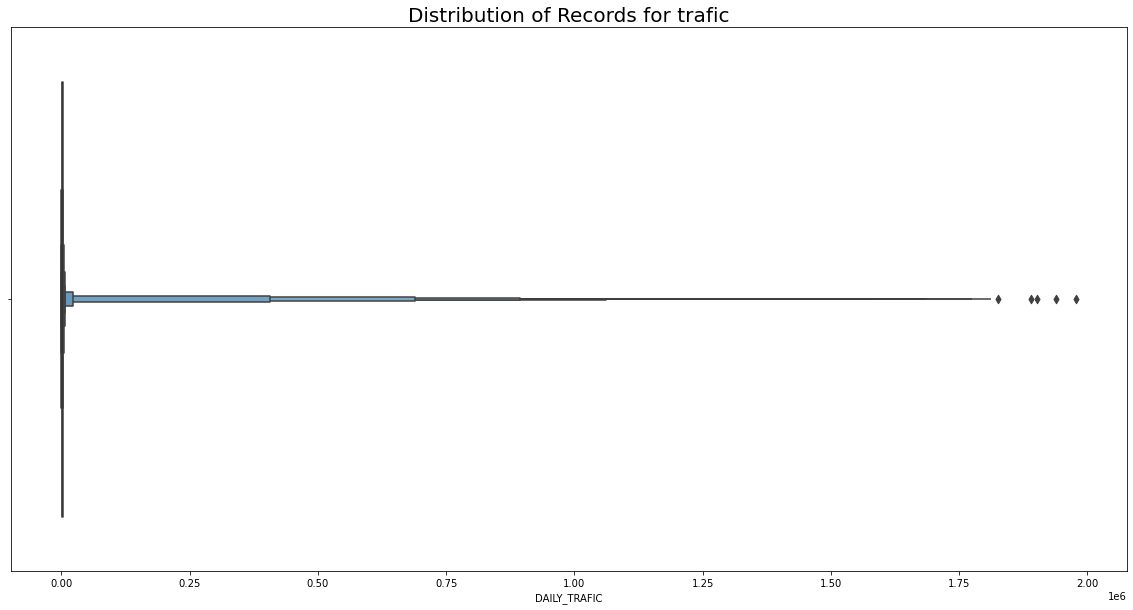

In [36]:
plt.figure(figsize=(20,10))
g = sns.boxenplot(x='DAILY_TRAFIC', data=ts_daily )
plt.title("Distribution of Records for trafic", fontsize=20)
plt.savefig("outliersb.png");

In [37]:
#drop everything greater than 1.8 x 10^(6)
ts_daily = ts_daily [ts_daily.DAILY_TRAFIC <= 1800000]

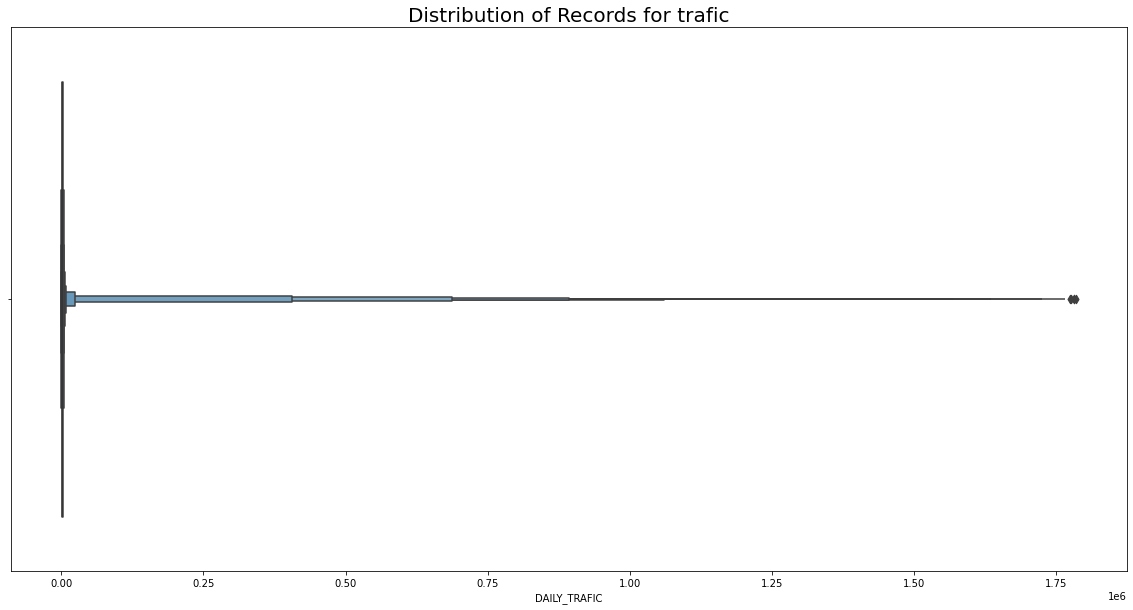

In [38]:
plt.figure(figsize=(20,10))
g = sns.boxenplot(x='DAILY_TRAFIC', data=ts_daily )
plt.title("Distribution of Records for trafic", fontsize=20)
plt.savefig("outliersa.png");

In [39]:
#define new dataframe that take station and date by the sum of daily trafic
station_daily = ts_daily.groupby(["STATION",'DATE'])[['DAILY_TRAFIC']].sum().reset_index()

In [40]:
station_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102235 entries, 0 to 102234
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   STATION       102235 non-null  object        
 1   DATE          102235 non-null  datetime64[ns]
 2   DAILY_TRAFIC  102235 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.3+ MB


## Data Visualization

In [41]:
#top 10 stations
top_station = station_daily.groupby("STATION").sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index().head(10)\
    
top_station

,STATION,DAILY_TRAFIC
0,34 ST-PENN STA,197454870.0
1,GRD CNTRL-42 ST,155585427.0
2,34 ST-HERALD SQ,133993307.0
3,TIMES SQ-42 ST,132529431.0
4,23 ST,128834371.0
5,FULTON ST,125611463.0
6,42 ST-PORT AUTH,108716813.0
7,14 ST-UNION SQ,98192351.0
8,125 ST,97246021.0
9,CANAL ST,97194618.0


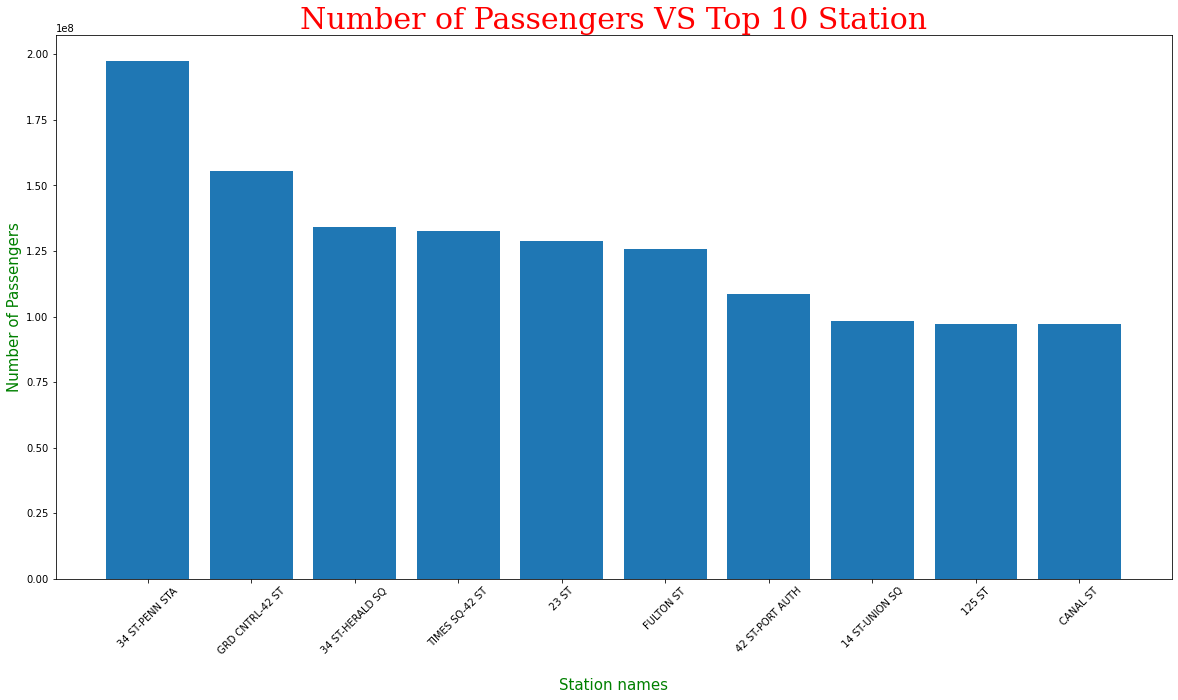

In [55]:
plt.figure(figsize=(20,10))
plt.bar(top_station['STATION'], top_station['DAILY_TRAFIC'])
plt.ylabel('Number of Passengers', fontsize = 15 , color = 'g')
plt.xlabel('\nStation names', fontsize = 15, color = 'g')
plt.xticks(rotation=45)
plt.title('Number of Passengers VS Top 10 Station', fontsize = 30,family = 'serif' , c = 'r')
plt.savefig("top10stat.jpg");

In [43]:
ts_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289827 entries, 1 to 1294918
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   C/A            1289827 non-null  object        
 1   UNIT           1289827 non-null  object        
 2   SCP            1289827 non-null  object        
 3   STATION        1289827 non-null  object        
 4   DATE           1289827 non-null  datetime64[ns]
 5   ENTRIES        1289827 non-null  int64         
 6   PREV_DATE      1289827 non-null  datetime64[ns]
 7   PREV_ENTRIES   1289827 non-null  float64       
 8   EXITS          1289827 non-null  int64         
 9   PREV_EXITS     1289827 non-null  float64       
 10  DAILY_ENTRIES  1289827 non-null  float64       
 11  DAILY_EXITS    1289827 non-null  float64       
 12  DAILY_TRAFIC   1289827 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 137.8+ MB


In [44]:
#droping what i wont use  
ts_daily.drop(['ENTRIES','PREV_ENTRIES','EXITS','PREV_EXITS','PREV_DATE'],axis = 1 , inplace = True)

**In next cell im going to define dataframe for each top 10 stations.**

In [45]:
ST_PENN_STA_station  = ts_daily[ 
(ts_daily["STATION"] == "34 ST-PENN STA")
].reset_index(drop=True)

GRD_CNTRL_42_ST_station = ts_daily[ 
(ts_daily["STATION"] == "GRD CNTRL-42 ST")].reset_index(drop=True)

TIMES_SQ_42_station  = ts_daily[ 
(ts_daily["STATION"] == "TIMES SQ-42 ST")
].reset_index(drop=True)

ST_HERALD_station = ts_daily[ 
(ts_daily["STATION"] == "34 ST-HERALD SQ")].reset_index(drop=True)


ST_23_station = ts_daily[ 
(ts_daily["STATION"] == "23 ST")].reset_index(drop=True)


FULTON_ST_station = ts_daily[ 
(ts_daily["STATION"] == "FULTON ST")].reset_index(drop=True)

ST_PORT_AUTH_station = ts_daily[ 
(ts_daily["STATION"] == "42 ST-PORT AUTH")].reset_index(drop=True)

ST_UNION_SQ_station = ts_daily[ 
(ts_daily["STATION"] == "14 ST-UNION SQ")].reset_index(drop=True)

ST_125_station = ts_daily[ 
(ts_daily["STATION"] == "125 ST")].reset_index(drop=True)

CANAL_ST_station = ts_daily[ 
(ts_daily["STATION"] == "CANAL ST")].reset_index(drop=True)


In [46]:
ST_PENN_STA_station

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFIC
0,N067,R012,00-00-00,34 ST-PENN STA,2017-05-28,143.0,271.0,414.0
1,N067,R012,00-00-00,34 ST-PENN STA,2017-05-29,153.0,255.0,408.0
2,N067,R012,00-00-00,34 ST-PENN STA,2017-05-30,505.0,1600.0,2105.0
3,N067,R012,00-00-00,34 ST-PENN STA,2017-05-31,636.0,1526.0,2162.0
4,N067,R012,00-00-00,34 ST-PENN STA,2017-06-01,665.0,1449.0,2114.0
...,...,...,...,...,...,...,...,...
26596,R142,R293,01-06-01,34 ST-PENN STA,2019-08-26,558.0,1060.0,1618.0
26597,R142,R293,01-06-01,34 ST-PENN STA,2019-08-27,570.0,1249.0,1819.0
26598,R142,R293,01-06-01,34 ST-PENN STA,2019-08-28,583.0,1284.0,1867.0
26599,R142,R293,01-06-01,34 ST-PENN STA,2019-08-29,689.0,1227.0,1916.0


**In next cell im going to find best entry for each station.**

In [47]:
top_ENT_ST_PENN = ST_PENN_STA_station.groupby('UNIT').sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_GRD = GRD_CNTRL_42_ST_station.groupby(['UNIT']).sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_TIMES = TIMES_SQ_42_station.groupby(['UNIT']).sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_ST_HERALD = ST_HERALD_station.groupby(['UNIT']).sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_ST_23 = ST_23_station.groupby(['UNIT']).sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_FULTON_ST = FULTON_ST_station.groupby(['UNIT']).sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_ST_PORT_AUTH = ST_PORT_AUTH_station.groupby(['UNIT']).sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_ST_UNION = ST_UNION_SQ_station.groupby(['UNIT']).sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_ST_125 = ST_125_station.groupby(['UNIT']).sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_CANAL_ST = CANAL_ST_station.groupby(['UNIT']).sum()\
    .sort_values('DAILY_TRAFIC', ascending=False).reset_index()\

top_ENT_CANAL_ST

,UNIT,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFIC
0,R463,16074827.0,12893828.0,28968655.0
1,R139,14231270.0,12772838.0,27004108.0
2,R462,12241823.0,11482358.0,23724181.0
3,R118,6715991.0,2539624.0,9255615.0
4,R320,4174099.0,4067960.0,8242059.0


<ipython-input-48-2d2f2d7c351e>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('Crowded passengers For A Every Station', fontsize = 20, Family = 'Verdana' , c = 'c')


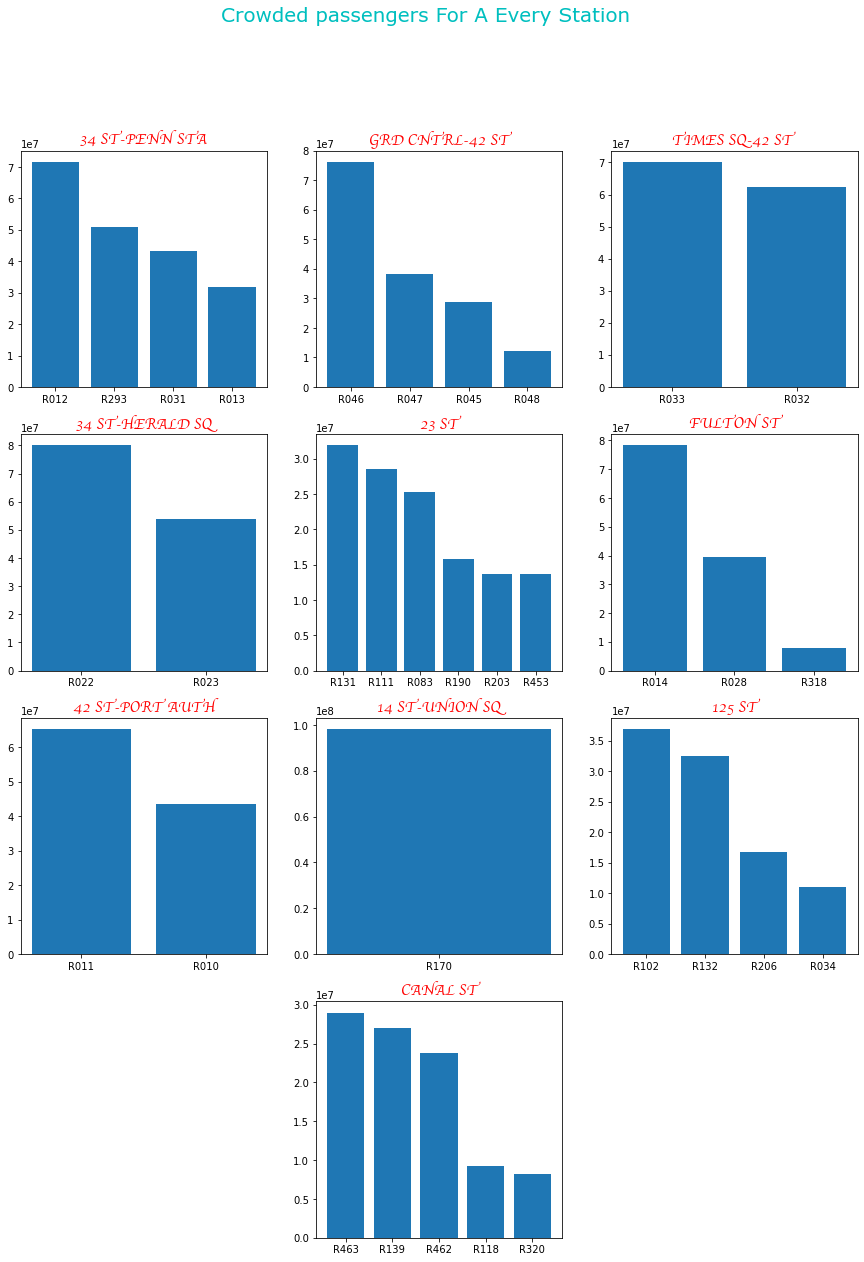

In [48]:
plt.figure(figsize = [15,20])
plt.suptitle('Crowded passengers For A Every Station', fontsize = 20, Family = 'Verdana' , c = 'c')
plt.subplot(4,3,1)
plt.bar(top_ENT_ST_PENN['UNIT'] , top_ENT_ST_PENN['DAILY_TRAFIC'])
plt.title('34 ST-PENN STA',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(4,3,2)
plt.bar(top_ENT_GRD['UNIT'],top_ENT_GRD['DAILY_TRAFIC'])
plt.title('GRD CNTRL-42 ST',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(4,3,3)
plt.bar(top_ENT_TIMES['UNIT'] , top_ENT_TIMES['DAILY_TRAFIC'])
plt.title('TIMES SQ-42 ST ',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(4,3,4);
plt.bar(top_ENT_ST_HERALD['UNIT'],top_ENT_ST_HERALD['DAILY_TRAFIC'])
plt.title('34 ST-HERALD SQ',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(4,3,5)
plt.bar(top_ENT_ST_23['UNIT'],top_ENT_ST_23['DAILY_TRAFIC'])
plt.title('23 ST',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(4,3,6)
plt.bar(top_ENT_FULTON_ST['UNIT'],top_ENT_FULTON_ST['DAILY_TRAFIC'])
plt.title('FULTON ST',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(4,3,7)
plt.bar(top_ENT_ST_PORT_AUTH['UNIT'],top_ENT_ST_PORT_AUTH['DAILY_TRAFIC'])
plt.title('42 ST-PORT AUTH',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(4,3,8)
plt.bar(top_ENT_ST_UNION['UNIT'],top_ENT_ST_UNION['DAILY_TRAFIC'])
plt.title('14 ST-UNION SQ',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(4,3,9)
plt.bar(top_ENT_ST_125['UNIT'],top_ENT_ST_125['DAILY_TRAFIC'])
plt.title('125 ST',fontsize = 15 , family='cursive', c = 'r')
plt.subplot(4,3,11)
plt.bar(top_ENT_CANAL_ST['UNIT'],top_ENT_CANAL_ST['DAILY_TRAFIC'])
plt.title('CANAL ST',fontsize = 15 , family='cursive', c = 'r')
plt.savefig('bestentry.png');

**For next cells I'm going to find daily average trafic per week to find the best days for mantenance and refill machines**   

In [49]:
top_station

,STATION,DAILY_TRAFIC
0,34 ST-PENN STA,197454870.0
1,GRD CNTRL-42 ST,155585427.0
2,34 ST-HERALD SQ,133993307.0
3,TIMES SQ-42 ST,132529431.0
4,23 ST,128834371.0
5,FULTON ST,125611463.0
6,42 ST-PORT AUTH,108716813.0
7,14 ST-UNION SQ,98192351.0
8,125 ST,97246021.0
9,CANAL ST,97194618.0


In [50]:
station_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily['DATE']).dt.dayofweek
station_daily_avg = station_daily.groupby(['STATION', 'DAY_OF_WEEK_NUM'])['DAILY_TRAFIC'].mean().reset_index()
station_daily_avg

,STATION,DAY_OF_WEEK_NUM,DAILY_TRAFIC
0,1 AV,0,35216.307692
1,1 AV,1,38908.923077
2,1 AV,2,41213.717949
3,1 AV,3,40848.692308
4,1 AV,4,41496.051282
...,...,...,...
2648,ZEREGA AV,2,5000.820513
2649,ZEREGA AV,3,4950.846154
2650,ZEREGA AV,4,4750.128205
2651,ZEREGA AV,5,70746.578947


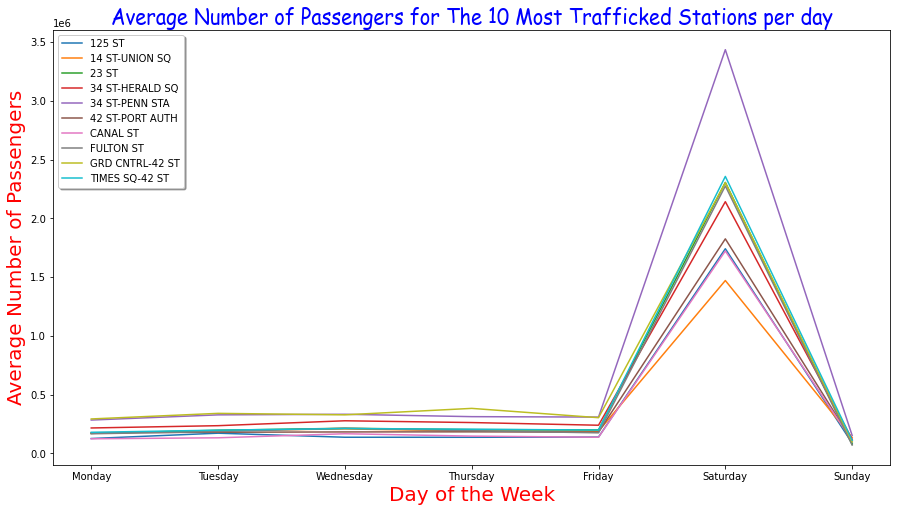

In [56]:
station_name =((station_daily_avg['STATION'] == '34 ST-PENN STA')|
               (station_daily_avg['STATION'] == 'GRD CNTRL-42 ST')|
               (station_daily_avg['STATION'] == '34 ST-HERALD SQ')|
               (station_daily_avg['STATION'] == 'TIMES SQ-42 ST')|
               (station_daily_avg['STATION'] == '23 ST')|
               (station_daily_avg['STATION'] == 'FULTON ST')|
               (station_daily_avg['STATION'] == '42 ST-PORT AUTH')|
               (station_daily_avg['STATION'] == '14 ST-UNION SQ')|
               (station_daily_avg['STATION'] == '125 ST')|
               (station_daily_avg['STATION'] == 'CANAL ST'))
station_day_avg_top = station_daily_avg[station_name].reset_index()
plt.figure(figsize=(15,8)) 
for i, group in station_day_avg_top.groupby('STATION'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_TRAFIC'], label = i)
plt.legend(shadow = True, loc = 0, fontsize = 10)
plt.xlabel('Day of the Week',fontsize = 20,c = 'r');
plt.ylabel('Average Number of Passengers',fontsize = 20,c = 'r');
plt.title('Average Number of Passengers for The 10 Most Trafficked Stations per day', fontsize = 20,family = 'fantasy',c = 'b')
plt.xticks(np.arange(7),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.savefig('avgDperW.png');


## Conclusion:

    1- The top stations are :34 ST-PENN STA, GRD CNTRL-42 ST, 34 ST-HERALD SQ, TIMES SQ-42 ST, 23 ST, FULTON ST, 42 ST-PORT AUTH, 14 ST-UNION SQ, 125 ST, CANAL ST.
    2- Each station have multiple entry so i choosed best entry.
    3- Weekdays is the best days for mantenance and refill vending machines.